# Assignment 2

# Group 5:

|Name|Matrikel-Nr.|
|---|---|
|Guan, Fuqi|03665875|
|Qiu,Yicheng|03712904|
|Wu, Fan|03714421|
|Zhao, Yidong|03710074|
|Zheng, Hanwen|03710585|


## Task 1
**Task 1.1**   

$s^T\Sigma= [s_{1},s_{2},\cdots,s_{p}]\bullet \left[\begin{matrix}\sigma_{11}&0&0&...&0\\
                                                            0&\sigma_{22}&0&...&0\\
                                                            \vdots & \vdots & \ddots & \vdots \\
                                                            0&0&\cdots&\sigma_{pp}&0\end{matrix}\right]$
$=\left[
\begin{matrix}
s_1\sigma_{11}&s_2\sigma_{22}&s_3\sigma_{33}&\cdots&s_p\sigma_{pp}&0&\cdots&0
\end{matrix}
\right]$  
  
  
$\Rightarrow s^T\Sigma\Sigma^Ts=\sum_{i=1}^{i=p}{s_i\sigma_{ii}}^2= \sigma_{11}^2\sum_{i=1}^p \frac{\sigma_{ii}^2}{\sigma_1^2}s_i^2 \leq  \sigma_{11}^2 \sum_{i=1}^p s_i^2=\sigma_{11}^2$, $(\sigma_{11}>\sigma_{22}>...>\sigma_{pp})$  
equality holds when $s_1^2=1, s_i^2=0, (i\geq2)$.
So, a possilble $\mathbf{\hat s}$ is $\mathbf{\hat s}=[1, 0, ..., 0]^T$.
   
   
**Task 1.2**   

SVD of $\mathbf X$ is $\mathbf{X=U\Sigma V^T}$, where $\mathbf U$ is an orthogonal matrix and all columns of $\mathbf U$ form a set of orthonormal bases of $\mathbb R^p$. So, vector $\mathbf a$ can be written as: $\mathbf{a=Uk}$.   
Note that orthogonal matrices do not change the length of a vector, that is $\mathbf{\Vert k\Vert = \Vert a \Vert = 1}$.  
Then,   
$\dfrac{1}{N}\mathbf{a^TXX^Ta}\\ =\dfrac{1}{N}\mathbf{k^TU^T(U\Sigma V^T )(V\Sigma^TU^T)Uk}\\=\dfrac{1}{N}\mathbf{k^T(U^TU)\Sigma (V^T V)\Sigma^T(U^TU)k}\\=\dfrac{1}{N}\mathbf{k^T\Sigma \Sigma^Tk}$.  
According the conclusion of the last problem,  
$\mathbf{\hat k}=\mathop{argmax}_{\mathbf k,\ s.t., \Vert \mathbf k \Vert = 1 } \mathbf{k^T\Sigma \Sigma^Tk}= \left[1\ 0\ \cdots\ 0 \right]^T$.  
Hence,   
$\mathbf{ \hat a = U\hat k =u_1}$   


## Task 2


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from numpy.linalg import svd, norm


fpath = "./data/task2_data/yaleBfaces"
train_subdir = fpath + '/subset0/'
test_subdirs = [fpath + '/subset%d/'%(i+1) for i in range(4)]

# reading images and labels from file
# trainging images
TrainT = np.array( [np.ravel(plt.imread(train_subdir + imgpth)) \
          for imgpth in listdir(train_subdir) ] ).T
# training labels
LabelT = np.array([imgpth.split('_')[0][-2:] for\
                   imgpth in listdir(train_subdir)]).astype('int32')

# list of test images in subsets[1-4]
TestS = [ np.array( [np.ravel(plt.imread(test_subdirs[i] + imgpth)) \
          for imgpth in listdir(test_subdirs[i]) ] ).T for  i in range(4)]

# list of test labels in subsets[1-4]
LabelS =[ np.array([imgpth.split('_')[0][-2:] for\
                   imgpth in listdir(test_subdirs[i])]).astype('int32') for i in range(4) ]

- 1. function `first20SingularVectors` takes vectorized images [`T`] as input, returns first 20 singular vectors.

In [2]:
def first20SingularVectors(T):
    '''
    find out first 20 principal components of T
    '''
    n_samples = T.shape[1]
    
    center = np.mean(T, axis=1)    # centralize T
    Mu = np.tile(center, (n_samples, 1)).T
    
    u, s, vh = svd(T-Mu) # svd
    
    return np.mat(u[:, 0:20])

 Now display the first 3 principal components.

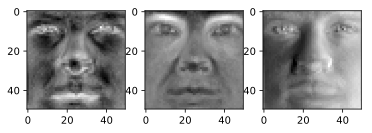

In [3]:
u = first20SingularVectors(TrainT)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# display the first 3 principal components
plt.subplot(1,3,1)
plt.imshow(u[:,0].reshape((50,50)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(u[:,1].reshape((50,50)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(u[:,2].reshape((50,50)), cmap='gray')
plt.show()

- 2. function `evaluateClassification` takes vectorized traing images [`T`], training labels[`LabelT`], test image[`S`], test labels [`LabelS`], and number of PCs [`k`] as input, returns the classification error rate.

In [4]:
def evaluateClassification(T, LabelT, S, LabelS, k, start=0):
    '''
    evaluating the classification result using training set (T, LabelT) and test set (S, LabelS),
    principal components[start:start+k] are applied in reducing dimensionality, where default [start] is 0.
    '''
    
    Uk = first20SingularVectors(TrainT)[:, start:start + k];   # first 20 principal components    
    center = np.mean(T, axis=1)  # mean value of all samples in training set
    
    # centralization
    def centralize(X, center):        
        n_samples = X.shape[1]
        Mu = np.tile(center, (n_samples, 1)).T 
        Xc = X - Mu        
        return np.mat(Xc)
    
    # dimensionality reduction
    Yt = Uk.T * centralize(T, center)
    Ys = Uk.T * centralize(S, center)    
    
    
    # classification and evaluation
    n_train = Yt.shape[1]
    n_tests = Ys.shape[1]
    
    error_rate = 0
    for s in range(n_tests):
        dist = norm(np.tile(Ys[:, s], (1, n_train)) - Yt, axis=0) # euclidean distance
        
        index_nns = np.argsort(dist)[0:3]  
        pred_nns = np.array([LabelT[i] for i in index_nns]) # prediction of 3 nearest neighbours       
        
        prediction = np.bincount(pred_nns).argmax() # the most frequent occurrence as final prediction 
        reallabel = LabelS[s]
        
        error_rate += (prediction != reallabel) # mismatch
    return (error_rate/n_tests)


Evaluating through subset 1-4

In [5]:
error_rates = []
for i in range(4):
    print("Evaluating subset %d..."%(i+1))
    error_rate = np.array([evaluateClassification(TrainT, LabelT, TestS[i], LabelS[i], k) \
              for k in range(1, 21)] )
    print("*** Subset %d error rate: %.2f %%"%(i+1, 100*error_rate[-1]))
    error_rates.append(error_rate)
print('Done!')

Evaluating subset 1...
*** Subset 1 error rate: 5.83 %
Evaluating subset 2...
*** Subset 2 error rate: 57.50 %
Evaluating subset 3...
*** Subset 3 error rate: 82.14 %
Evaluating subset 4...
*** Subset 4 error rate: 87.89 %
Done!


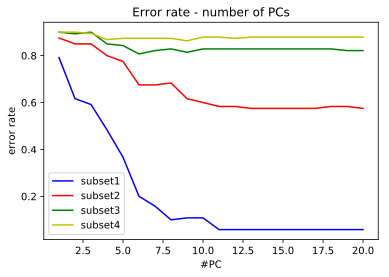

In [6]:
plt.figure()
plt.plot(np.arange(1,21), error_rates[0], 'b-',
         np.arange(1,21), error_rates[1], 'r-',
         np.arange(1,21), error_rates[2], 'g-',
         np.arange(1,21), error_rates[3], 'y-',)
plt.title('Error rate - number of PCs')
plt.xlabel('#PC')
plt.ylabel('error rate')
plt.legend(("subset1",
        "subset2",
        "subset3",
        "subset4")
       )
'''
'''
plt.show()

- 3. Eliminating the first 3 PCs, repeat the evaluation. 

In [7]:
error_rates_2 = []
for i in range(4):
    print("Evaluating subset %d..."%(i+1))
    error_rate = np.array([evaluateClassification(TrainT, LabelT, TestS[i], LabelS[i], k, start=3) \
              for k in range(1, 18)] )
    print("*** Subset %d error rate: %.2f %%"%(i+1, 100*error_rate[-1]))
    error_rates_2.append(error_rate)
print('Done!')



Evaluating subset 1...
*** Subset 1 error rate: 5.00 %
Evaluating subset 2...
*** Subset 2 error rate: 28.33 %
Evaluating subset 3...
*** Subset 3 error rate: 70.00 %
Evaluating subset 4...
*** Subset 4 error rate: 91.05 %
Done!


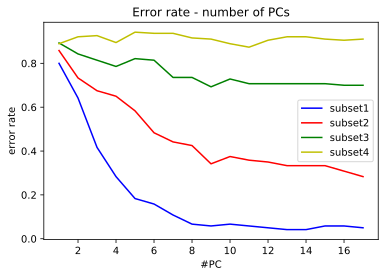

In [8]:
plt.figure()
plt.plot(np.arange(1,18), error_rates_2[0], 'b-',
         np.arange(1,18), error_rates_2[1], 'r-',
         np.arange(1,18), error_rates_2[2], 'g-',
         np.arange(1,18), error_rates_2[3], 'y-',)
plt.title('Error rate - number of PCs')
plt.xlabel('#PC')
plt.ylabel('error rate')
plt.legend(("subset1",
        "subset2",
        "subset3",
        "subset4")
       )
plt.show()

+ The 2 figures above shows that the more PCs we use, the lower the error rate is, because more information is preserved in higher dimension. Classification of data in subset 1 has the lowest error rate, while in subset 4 the highest. This is due to the difference of image quality between the 4 subsets.  
+ The prediction error in subset 1, subset 2 and subset 3 decreases if we take the first 3 PCs away. This is probably because in these subsets, data drawn out of different classes is more separable when projected to the 4th to 20th PCs than projected to the 1st to 20th PCs. The error rate of subset 4 doesn't change that much and stays very high, because these images are captured in dark environment, such that it's almost impossible to distinguish these photos from each other.  
PCA is an **unsupervised process** and is helpful in dimensional reduction, but when projected to different principal component spaces, classification of data drawn from different classes could be easier or harder depending on the distribution of each class.   
The following experiment shows the case that classification would be better if data projected to the second principal component than to the first two principal components. Point $(-1, -2)$ would be misclassified when projected to the first two principal components if 1-NN algorithm used. When it is projected to only the 2nd principal component, however, the classification would be right.

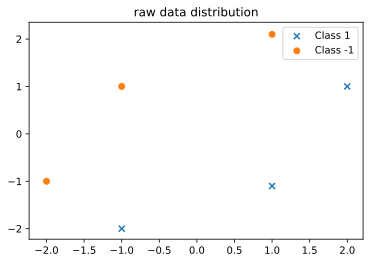

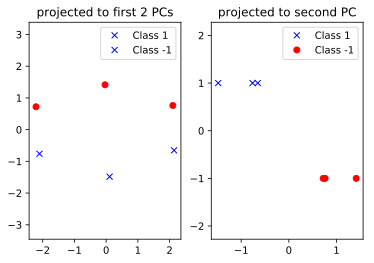

In [9]:
#X = np.arange(-1, 1, 0.01)
#Y = X + 0.3*np.random.randn(X.shape[0])
X = np.array([-2, -1, -1, 1, 1, 2])
Y = np.array([-1, 1, -2, 2.1, -1.1, 1])
TrainT = np.concatenate(([X], [Y]))
# class 1
class1_points = np.array([(X[i], Y[i]) for i in range(X.shape[0]) if X[i] > Y[i]])

# class 2
class2_points = np.array([(X[i], Y[i]) for i in range(X.shape[0]) if X[i] < Y[i]])


# visual 2 classes of raw data
plt.figure()
plt.scatter(class1_points[:,0], class1_points[:,1], marker='x')
plt.scatter(class2_points[:,0], class2_points[:,1], marker='o')
plt.title('raw data distribution')
plt.legend(('Class 1','Class -1'))
plt.show()

# pca
[u, s, vh] = svd(TrainT)
u = np.mat(u)
class1_points = np.mat(class1_points).T
class2_points = np.mat(class2_points).T

projection1_class1 = u.T * class1_points
projection1_class2 = u.T * class2_points

# visualize reduced 2 classes
plt.figure()
plt.subplot(121)
plt.plot(projection1_class1[0,:],projection1_class1[1,:], 'bx',
         projection1_class2[0,:],projection1_class2[1,:], 'ro',)
plt.title('projected to first 2 PCs')
plt.legend(('Class 1','Class -1'))
plt.axis('equal')

projection2_class1 = u[:, 1].T * class1_points;
projection2_class2 = u[:, 1].T * class2_points;
class1_reduced2 = np.array([(projection2_class1[0,i], 1) for i in range(projection2_class1.shape[1])])
class2_reduced2 = np.array([(projection2_class2[0,i], -1) for i in range(projection2_class2.shape[1])])

plt.subplot(122)
plt.plot(class1_reduced2[:,0],class1_reduced2[:,1], 'bx',
         class2_reduced2[:,0],class2_reduced2[:,1], 'ro',)
plt.title('projected to second PC')
plt.legend(('Class 1','Class -1'))
plt.axis('equal')
plt.show()